<a href="https://colab.research.google.com/github/ranand97/ranand97/blob/main/Assignment_3_Rishabh_Anand.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**BA780-Assignment 3 Heart Disease Predictor-Framingham-EDA**##


Cardiovascular research which is taking place on the residents of Framingham city in USA. The goal is to predict the 10-yrs risk of coronary heart disease, based on the data we have.

##Motivation##
The Framingham Heart Study is a long term prospective study of the etiology of cardiovascular disease among a population of free living subjects in the community of Framingham, Massachusetts. The Framingham Heart Study was a landmark study in epidemiology in that it was the first prospective study of cardiovascular disease and identified the concept of risk factors and their joint effects FHS Longitudinal Data Document.

##Data information##
*   **Male:** To identify the sex 1: Male and 0: Female (Categorical feature)
*   **Age:** To identify the age (Numerical feature)
*   **Education:** To identify the level of education as 1,2,3 or 4 (Categorical feature)
*   **currentSmoker:** To identify the smoker status whether 1: yes or 0: no (Categorical feature)
*   **cigsPerDay:** To identify the number of cigarettes per day (Numerical feature)
*   **BPMeds:** To identify if BP Meds are taken or not 1: yes or 0: no (Categorical feature)
*   **prevalentStroke:** To identify if the patient suffers from strokes or not 1: yes or 0: no (Categorical feature)
*   **prevalentHyp:** To identify if the patient suffers from hypertension or not 1: yes or 0: no (Categorical feature)
*   **diabetes:** To identify if the patient suffers from diabetes or not 1: yes or 0: no (Categorical feature)
*   **totChol:** To identify the cholestrol level (Numerical feature)
*   **sysBP:** To identify the systolic blood pressure (Numerical feature)
*   **diaBP:** To identify the Diastolic Blood Pressure (Numerical feature)
*   **BMI:** To identify the Body Mass Index (Numerical feature)
*   **heartRate:** To identify the heart rate (Numerical feature)
*   **glucose:** To identify the glucose level (Numerical feature)
*   **TenYearCHD:** To identify the risk of 10-year risk of future coronary heart disease 1: yes or 0: no



**Basic information**:
*   The dataset has 4240 rows and 16 columns
*   Column Glucose has the highest missing percentage of NaN values.

In [1]:
#Importing the data csv file Framingham.csv
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Framingham.csv to Framingham.csv
User uploaded file "Framingham.csv" with length 191803 bytes


In [3]:
#Reading a CSV file named "Framingham.csv" into a DataFrame
df=pd.read_csv('Framingham.csv')

In [4]:
#Summary of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


## Impute missing values

Column Glucose has the highest missing percentage of NaN values.

In [5]:
#Find the percentage of missing values in each column
missing_value_perc = round(100 * (df.isnull().sum()/len(df)),2)
print("The percentage of missing values of each columns: \n\n",missing_value_perc)

The percentage of missing values of each columns: 

 male               0.00
age                0.00
education          2.48
currentSmoker      0.00
cigsPerDay         0.68
BPMeds             1.25
prevalentStroke    0.00
prevalentHyp       0.00
diabetes           0.00
totChol            1.18
sysBP              0.00
diaBP              0.00
BMI                0.45
heartRate          0.02
glucose            9.15
TenYearCHD         0.00
dtype: float64


In [6]:
#Find the sum of null values in all columns
nan_count = df.isna().sum()
print('Number of NaN values in each column:\n', nan_count)

Number of NaN values in each column:
 male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64


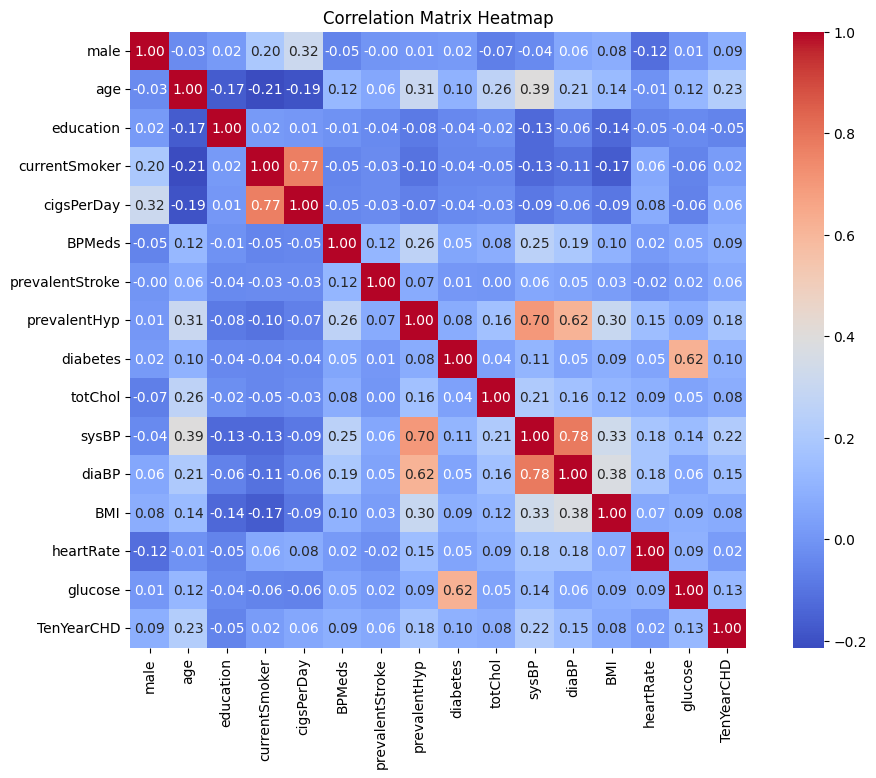

In [7]:
#Plotting the correlation matrix for wrt all columns
import seaborn as sns
correlation_matrix = df.corr()
correlation_matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Matrix Heatmap')
plt.savefig('correlation_heatmap_withnullvalues.png')
plt.show()

In [8]:
#We observe education column has a negative correlation with out Target Variable TenYearCHD
#Therefore dropping the column
df.drop('education', axis=1, inplace=True)

We observe education column has a negative correlation with our Target Variable TenYearCHD

In [9]:
#Used this to find skewness of each column
#Here we find that totChol,BMI,heartrate glucose there we can see that
#Skewness > 0: Positive skew (right-skewed),therefore we use median
skewness = df.skew()
skewness

male                0.285997
age                 0.228867
currentSmoker       0.023595
cigsPerDay          1.247052
BPMeds              5.551462
prevalentStroke    12.912160
prevalentHyp        0.818827
diabetes            5.995907
totChol             0.871881
sysBP               1.145285
diaBP               0.713250
BMI                 0.982183
heartRate           0.644372
glucose             6.214948
TenYearCHD          1.940516
dtype: float64



Skewness > 0: Right-skewed distribution (long right tail).

Skewness < 0: Left-skewed distribution (long left tail).

Skewness = 0: Perfectly symmetrical distribution.

Skewness > 0: Positive skew (right-skewed),therefore we use median and not mode or mean.Therefore we use median for all numerical data.

In [10]:
#Replace all null values with median of BMI
median_value = df['BMI'].median()
df['BMI'].fillna(median_value, inplace=True)

In [16]:
#Replace all null values with median of totChol
median_value = df['totChol'].median()
df['totChol'].fillna(median_value, inplace=True)

In [11]:
#Replace all null values with median of heartrate
median_value = df['heartRate'].median()
df['heartRate'].fillna(median_value, inplace=True)

In [12]:
#Replace all null values with median of Glucose
median_value = df['glucose'].median()
df['glucose'].fillna(median_value, inplace=True)

In [18]:
#Find out the values of Current Smoker and values of Cigs per day and replace with median of cigsperday
#currentsmoker = 0 will have no cigPerDay,therefore have take median of currentsmoker = 1
df['cigsPerDay'].fillna(int(df[df['currentSmoker']==1]['cigsPerDay'].median()), inplace=True)
#Convert cigsPerDay into datatype int
df['cigsPerDay']=df['cigsPerDay'].astype(int)

In [14]:
#Replace all null values with 0 of BPMed and convert it into datatype int
df['BPMeds'].fillna(0, inplace=True)
df['BPMeds']=df['BPMeds'].astype(int)

In [17]:
#Count the number of null_values
nan_count = df.isna().sum()
print('Number of NaN values in each column:\n', nan_count)

Number of NaN values in each column:
 male               0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64


# Exploratory Data Analysis

## Numerical features

##Target Variable##

Our aim is to predict the likelihood of an individual developing coronary heart disease (CHD), which is represented by a binary classification using the column "TenYearCHD." To assess the distribution of 'yes' or 'no' predictions, we can create a plot based on the values in this column.

Upon examination, it becomes evident that the binary classification is imbalanced, leaning more towards the '0' or 'yes' category. This indicates a notable likelihood of individuals being at risk of developing CHD is less.

The numerical variables are:
* age
* cigsPerDay
* totChol
* sysBP
* diaBP
* BMI
* heartRate
* glucose

### **Graph 1 : What is the distribution of chronic heart disease across the data given?**

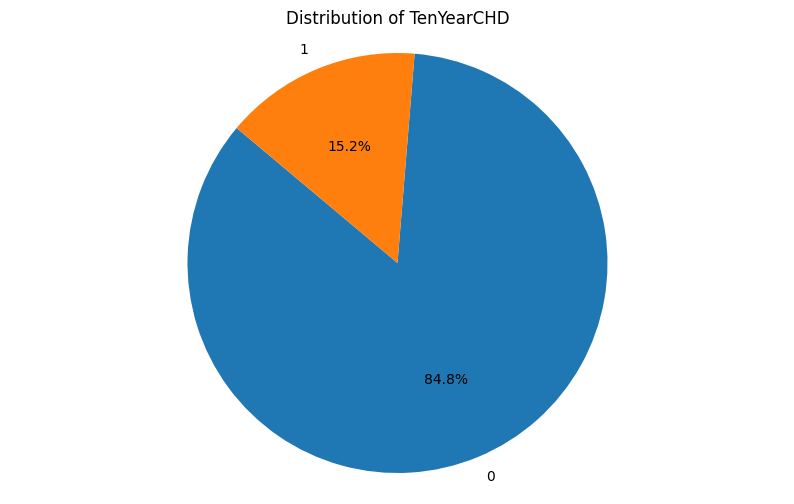

In [35]:
import matplotlib.pyplot as plt



# Count the occurrences of each category in 'TenYearCHD'
category_counts = df['TenYearCHD'].value_counts()

# Plot a pie chart
plt.figure(figsize=(10, 6))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of TenYearCHD')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the plot
plt.show()


 Graph 1 : Observation

*   We can observe that from the data given ,majority of people have less chances of developing a chronic heart disease in 10 year.
*   Data shows people who are at risk of developing a CHD are 84.8 % and people who are not at the risk of developing CHD constitutes 15.2%.


### **Graph 2 : Examine how age is related to CHD ?**

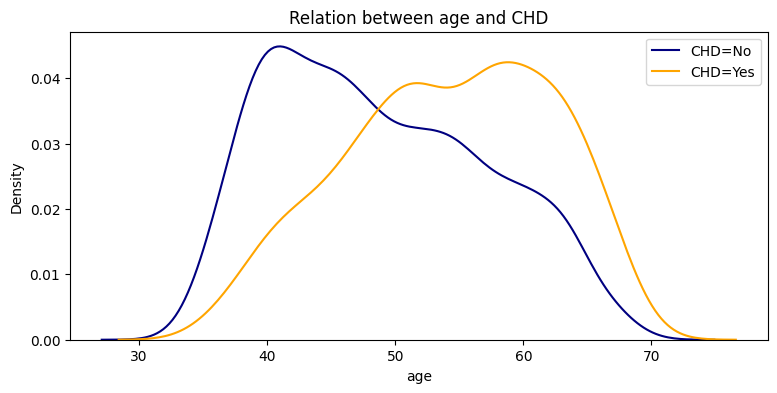

In [33]:
plt.figure(figsize=(9, 4))
plt.title("Relation between age and CHD")
ax0 = sns.kdeplot(df[df['TenYearCHD'] == 0]['age'], color= 'navy', label= 'CHD=No')
ax1 = sns.kdeplot(df[df['TenYearCHD'] == 1]['age'], color= 'orange',label= 'CHD=Yes')
plt.legend();

Graph 2 : Observation

*   We find that people with age less than 40  of having risk of chronic disease is less compared to people less than 40 who have risk of developing CHD.
*   We observe people above the age of 60 have more chances of developing Chronic Heart Disease.


## Categorical features

The categorical variables are:
* male
* currentSmoker
* BPMeds
* prevalentStroke
* prevalentHyp
* diabetes

### **Graph 3 : What is the relationship between currentsmoker and gender with respect to diaBP and sysBP ?**

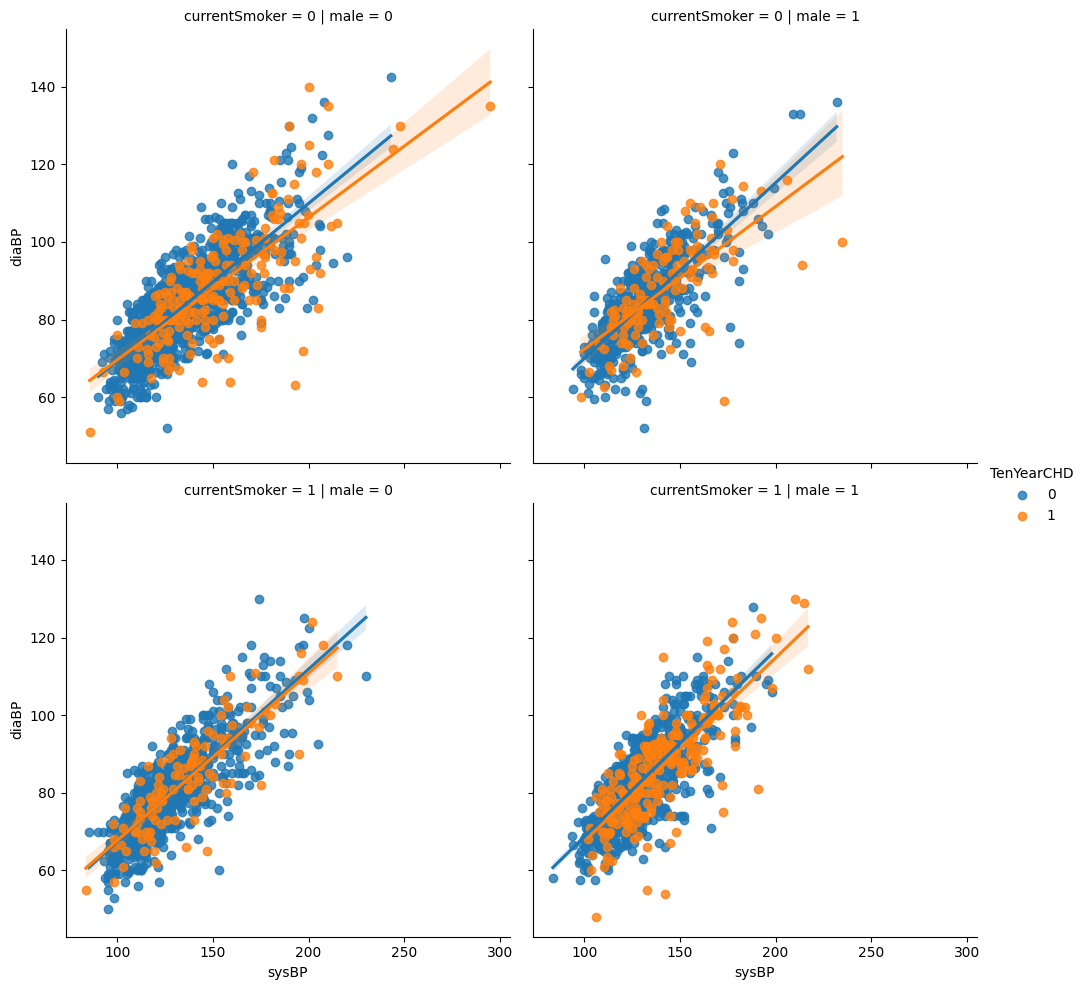

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

#required columns: 'sysBP', 'diaBP', 'TenYearCHD', 'male', 'currentSmoker'

# Create the lmplot
sns.lmplot(x='sysBP', y='diaBP',
           data=df,
           hue='TenYearCHD',
           col='male',
           row='currentSmoker')

# Display the plot
plt.show()

Graph 4 : Observation

* Females who are non smokers have more hypertension for developing a risk for CHD with respect to having Diastolic blood pressure and systolic blood pressure.
* Males who are non smokers have more hypertension for not developing a risk for CHD with respect to having Diastolic blood pressure and systolic blood pressure.
* Females who are smokers have  hypertension almost equivalent for both  developing a risk and not developing a risk for CHD with respect to having Diastolic blood pressure and systolic blood pressure.
* Males who are  smokers have more hypertension for developing a risk for CHD with respect to having Diastolic blood pressure and systolic blood pressure.


### **Graph 4: Does age of a man or a female affect diabetes and their chances of having Chronic Heart disease?**

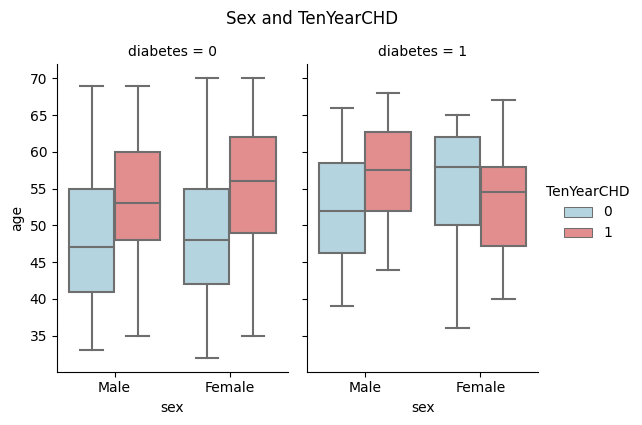

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert the 'male' column to 'sex' with 'Male' and 'Female' categories
df['sex'] = df['male'].map({1: 'Male', 0: 'Female'})

# Create the box plot using seaborn with customized aesthetics
g = sns.catplot(x="sex", y="age", hue="TenYearCHD", col="diabetes", data=df, kind="box", height=4, aspect=.7,
                palette={0: 'lightblue', 1: 'lightcoral'})
plt.suptitle("Sex and TenYearCHD", y=1.05)

# Show the plot
plt.show()

Graph 4 : Observation

* Females who dont have diabetes and are above 60 years have more risk to develop CHD compared to males who also dont have diabetes and are above 60.
* Males who are above 60 years and who have diabetes have more risk to develop CHD compared to females above 60 and who have diabetes.

### **Graph 5: Does age of a man or a female affect diabetes and their chances of having Chronic Heart disease?**

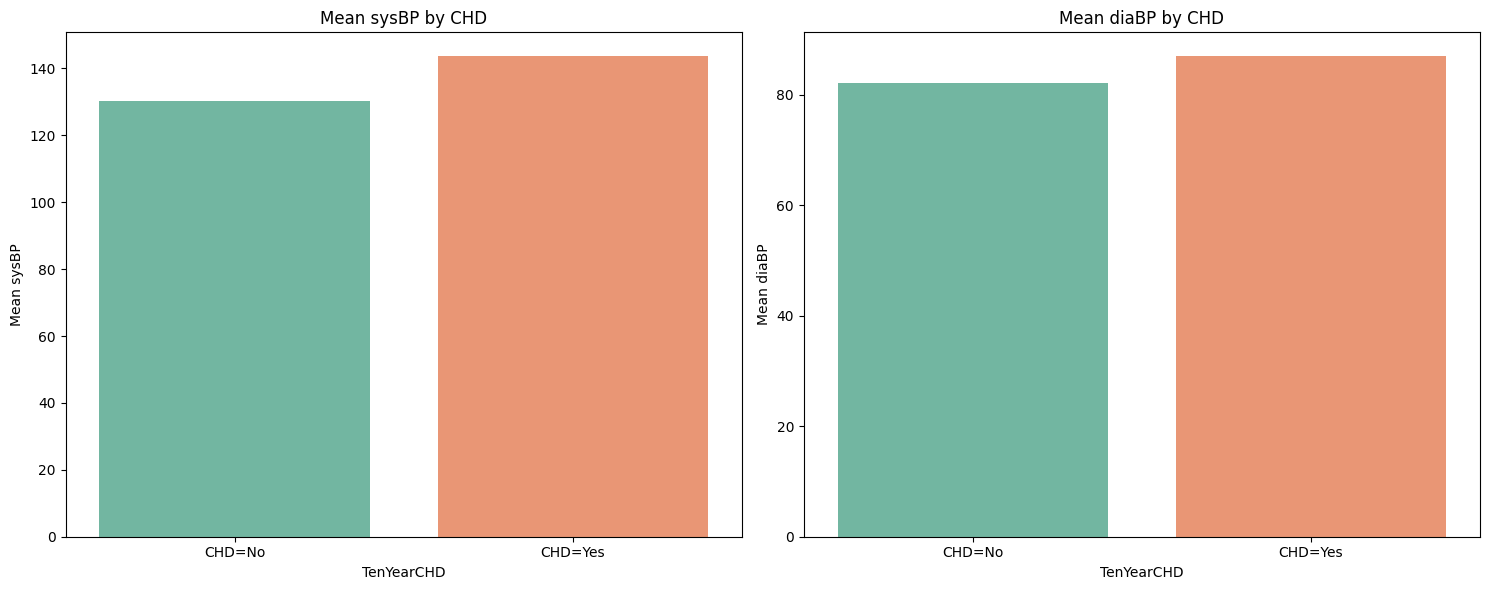

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Sample data (replace with your actual data)
# Assuming you have a DataFrame df with 'sysBP', 'diaBP', and 'TenYearCHD' columns
# df = ...

# Group data by 'TenYearCHD' and calculate the mean blood pressure for each group
mean_bp = df.groupby('TenYearCHD')[['sysBP', 'diaBP']].mean()

# Create a bar plot
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot mean sysBP
sns.barplot(x=mean_bp.index, y='sysBP', data=mean_bp, palette='Set2', ax=axes[0])
axes[0].set_xticklabels(['CHD=No', 'CHD=Yes'])
axes[0].set_ylabel('Mean sysBP')
axes[0].set_title('Mean sysBP by CHD')

# Plot mean diaBP
sns.barplot(x=mean_bp.index, y='diaBP', data=mean_bp, palette='Set2', ax=axes[1])
axes[1].set_xticklabels(['CHD=No', 'CHD=Yes'])
axes[1].set_ylabel('Mean diaBP')
axes[1].set_title('Mean diaBP by CHD')

plt.tight_layout()

Graph 5 : Observation
* We observe that people who have systolic blood pressure have more risk to develop CHD.The data shows that the value of Mean sysBP is above 140 for CHD=Yes compared to Mean sysBP for CHD=No which is less than 140.
* We observe that people who have Diastolic Blood Pressure have more risk to develop CHD.The data shows that the value of Mean diaBP is more for CHD=Yes compared to Mean diaBP for CHD=No.



# **Conclusions**

1.   Data shows people who are at risk of developing a CHD are 84.8 % and people who are not at the risk of developing CHD constitutes 15.2%.

2.   Females who dont have diabetes and are above 60 years have more risk to develop CHD compared to males who also dont have diabetes and are above 60.

3. The dataset has a strong correlation with age, sex, diastolic blood pressure, systolic blood pressure and the target variable. However, there is no correlation between education and the target variable.
